In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
import math

In [27]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [28]:
X[:10]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207],
       [ 3.43761754,  0.26165417],
       [-1.80822253,  1.59701749],
       [ 1.41372442,  4.38117707],
       [-0.20493217,  8.43209665],
       [-0.71109961,  8.66043846]])

In [29]:
y_true[:10]

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3])

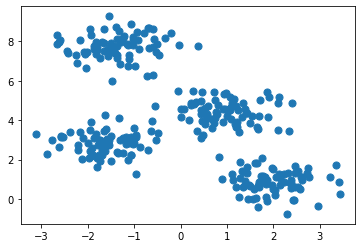

In [30]:
plt.scatter(X[:, 0], X[:, 1], s=50);

In [31]:
# based on expectation-maximization
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

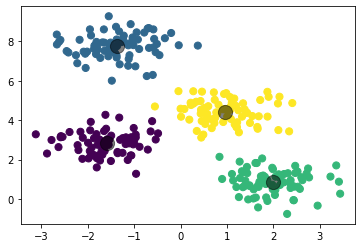

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [33]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [34]:
X[:10]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207],
       [ 3.43761754,  0.26165417],
       [-1.80822253,  1.59701749],
       [ 1.41372442,  4.38117707],
       [-0.20493217,  8.43209665],
       [-0.71109961,  8.66043846]])

In [35]:
X.shape

(300, 2)

In [54]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# sklearn implements kmeans using: "The k-means problem is solved using either Lloyd’s or Elkan’s algorithm."

# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

# https://realpython.com/k-means-clustering-python/
# centers == centroids
def find_clusters(X, n_clusters):
    if(len(X) < n_clusters):
        print("you can not request more cluster than data-points you have.")
        return
    # 1. specify the number k of cluster to assign
    # 2. randomly initialize k centroids
    rng = np.random.RandomState(1)
    # permutates indices of the rows (outputs which rows)
    # 1 row == 1 bundle == 1 scenario == here 2 elements (probably x and y) == in bundle more elements
    # permutation (here with 300 rows) = e.g. [ 84 217 211 286 ...]
    permutation = rng.permutation(X.shape[0])
    # holds the beginnen 5 row-indices of the rows-index-permutation
    # i = e.g. [ 84 217 211 286  31]
    i = permutation[:n_clusters]
    # holds the actual row-data (not just the indices) at the indices of i
    # that said, in a nutshell: center holds 5 random rows
    # centers = e.g. [[-0.94904161  8.46424331], [ 1.98436909  0.48955674], [-1.64129611  2.68097255], [-1.5587672   7.2481621 ], [-2.05701103  7.37851598]]
    # len(centers) == n_clusters == 5
    centers = X[i]
    counter = 0
    np_new_centers = np.array([])
    labels = np.array([])
    # 3. repeat until the centroid positions do not change
    # ("[...] after the centroids converge, or match the previous iteration’s assignment.")
    # initially the centroids do not match the previos iteration because
    # the centers change and the inididual data-points remain on their position
    # so maybe through the center-change, the point can be assigned to a new center
    # and the center change because in the last run they changed their position and now they maybe
    # include other data-points
    # they not change at some point anymore since 2 steps
    # 1. by adding a given set of data points in the previous run, the mean (of all points) does not change enough
    # 2. and because of 1. no more points in the current run change from their old centroid to a new one
 #np.all(centers == np_new_centers):
    while True:
        counter+=1
        # computes for each x in X which cen of centers is nearest and outputs the index of cen in centers
        # labels = e.g. [1 0 0 0 1 3 ...]
        # len(labels) == 300 (== len(X))
        # 4. expectation: assign each point to its closest centroid
        # 5. maximization: compute the new centroid (mean) of each cluster
        labels = np.array(custom_pairwise_euclidean_distances_argmin(X, centers))
#         labels = np.array(pairwise_distances_argmin(X, centers))
        new_centers = []
        for i in range(n_clusters):
            # output e.g. (array([  1,   2,   3,   8,   9, ...]))
            i_center_datapoints_indices = np.where(labels == i)
            if(len(i_center_datapoints_indices) == 0):
                new_centers.append(centers[i])
            else:
                # all datapoints of the current centroid i
                i_center_datapoints = X[i_center_datapoints_indices]
                i_center = custom_mean(i_center_datapoints)
                new_centers.append(i_center)
        np_new_centers = np.array(new_centers)
        if np.all(centers == np_new_centers):
            break
        centers = np_new_centers
    print("iterations: ", counter)
    print("inertia (Trägheit) (=Sum of squared distances of samples to their clostst cluster center): ", get_euclidean_inertia(X, centers, labels))
    return centers, labels

iterations:  5
0
1
2
3
inertia (Trägheit) (=Sum of squared distances of samples to their clostst cluster center):  9.35747055836408


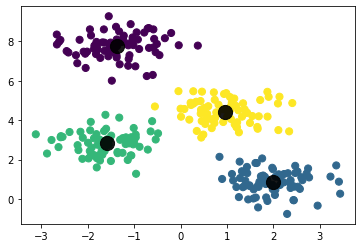

In [63]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.9);

In [25]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

In [13]:
e_data = np.array([\
      [0.83685684, 2.13635938],\
      [-1.4136581, 7.40962324],\
      [1.15521298, 5.09961887],\
      [-1.01861632, 7.81491465],\
      [1.27135141, 1.89254207],\
      [3.43761754, 0.26165417],\
      [-1.80822253, 1.59701749],\
      [1.41372442, 4.38117707],\
      [-0.20493217, 8.43209665],\
      [-0.71109961, 8.66043846]\
    ]);

find_clusters(e_data, 5)

NameError: name 'custom_pairwise_euclidean_distances_argmin' is not defined

In [14]:
nparr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
np.where(nparr % 2 == 0)

(array([1, 3, 5, 7, 9], dtype=int64),)

In [15]:
# public static float ndistance(float[] a, float[] b) {
#     float total = 0, diff;
#     for (int i = 0; i < a.length; i++) {
#         diff = b[i] - a[i];
#         total += diff * diff;
#     }
#     return (float) Math.sqrt(total);
# }

In [16]:
def euclidean_distance(vector_0, vector_1):
    total = 0
    diff = 0
    for a in range(len(vector_0)):
        diff = vector_0[a] - vector_1[a]
        total = total + diff * diff
    return math.sqrt(total)

In [17]:
euclidean_distance([1,2,3], [4,5,6])

5.196152422706632

In [18]:
def custom_pairwise_euclidean_distances_argmin(data, centroids):
    resultIndices = []
    for aIndex in range(len(data)):
        currentMinDistance = round(euclidean_distance(data[aIndex],centroids[0]),2)
        currentMinDistanceIndex = 0
        for bIndex in range(len(centroids)):
            distance = round(euclidean_distance(data[aIndex],centroids[bIndex]),2)
            if(distance < currentMinDistance):
                currentMinDistance = distance
                currentMinDistanceIndex = bIndex
        resultIndices.append(currentMinDistanceIndex)
    return resultIndices

In [19]:
exampleData = [[ 0.83685684,  2.13635938], [-1.4136581,   7.40962324],[ 1.15521298,  5.09961887], \
 [-1.01861632,  7.81491465],\
 [ 1.27135141,  1.89254207],\
 [ 3.43761754,  0.26165417],\
 [-1.80822253,  1.59701749],\
 [ 1.41372442,  4.38117707],\
 [-0.20493217,  8.43209665],\
 [-0.71109961,  8.66043846]]
centroids = [[ 1.07627418,  4.68480619],\
 [ 2.47019077,  1.31451315],\
 [ 1.24258802,  4.50399192],\
 [ 2.5270643,   0.6178122 ],\
 [-1.86849125,  3.07982487]]


custom_pairwise_euclidean_distances_argmin(exampleData, centroids)

[1, 0, 0, 0, 1, 3, 4, 2, 0, 0]

In [20]:
def custom_mean(vectors):
    dimensions = len(vectors[0])
    vector_elements = len(vectors)
    aggregate_vector = [0 for a in range(dimensions)]
    for a in range(vector_elements):
        for b in range(dimensions):
            aggregate_vector[b] += vectors[a][b]
    return [1.0 * a / vector_elements for a in aggregate_vector]

In [21]:
example_data = [[-1.41365810e+00,  7.40962324e+00],\
 [ 1.15521298e+00,  5.09961887e+00],\
 [-1.01861632e+00,  7.81491465e+00],\
 [-2.04932168e-01,  8.43209665e+00],\
 [-7.11099611e-01,  8.66043846e+00],\
 [-2.67000792e+00,  8.35389140e+00],\
 [ 4.53791789e-01,  3.95647753e+00],\
 [ 1.06923853e+00,  4.53068484e+00],\
 [ 7.34363910e-01,  5.03725437e+00],\
 [-5.55523811e-01,  4.69595848e+00],\
 [ 5.94762432e-01,  4.70964730e+00],\
 [ 1.86725632e-01,  4.02683656e+00]]
custom_mean(example_data)

[-0.19831188808333336, 6.060620195833333]

In [22]:
# 2 methods for elbow-method:
# 1. Distortion =  It is calculated as the average of the squared distances from the cluster centers of the respective clusters.
#  Typically, the Euclidean distance metric is used.
# 2. inertia = It is the sum of squared distances of samples to their closest cluster center.
def get_euclidean_inertia(vectors_of_all_centroids, data, labels):
    totaldistance = 0
    for a in range(len(data)):
        print(a)
        localdistance = euclidean_distance(data[a], vectors_of_all_centroids[labels[a]])
        totaldistance += localdistance
    return totaldistance

In [7]:
exampleData = [[ 0.83685684,  2.13635938],\
               [-1.4136581,   7.40962324],\
               [ 1.15521298,  5.09961887], \
             [-1.01861632,  7.81491465],\
             [ 1.27135141,  1.89254207],\
             [ 3.43761754,  0.26165417],\
             [-1.80822253,  1.59701749],\
             [ 1.41372442,  4.38117707],\
             [-0.20493217,  8.43209665],\
             [-0.71109961,  8.66043846]]

centroids = [[ 1.07627418,  4.68480619],\
 [ 2.47019077,  1.31451315],\
 [ 1.24258802,  4.50399192],\
 [ 2.5270643,   0.6178122 ],\
 [-1.86849125,  3.07982487]]

labels = [0,1,1,1,3,3,3,2,2,2]

get_euclidean_inertia(centroids, exampleData, labels)

0
1
2
3
4
5
6
7
8
9


37.372752063980826

In [8]:
[a for a in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]